# Data Understanding & Preparation: Titanic

We've all seen the movie and we know that there was enough space on the door for Leo to survive.

![Make room for Leo](jack-rose-raft-600x290.jpeg)

But what about the rest of the people? Can we study the incident with a data-driven approach?

The **Titanic** dataset became famous after ***Kaggle*** launched a competition to label the passengers as **survived** or not, exploiting some available features ([link](https://www.kaggle.com/c/titanic)).

In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats.stats import pearsonr
DATASET_FOLDER = "Dataset/Dataset Visti a Lezione/"

/var/folders/6q/_3drv0jj7gl84qlk8zq76vg40000gn/T/ipykernel_34996/1307797467.py:9: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
titanic = pd.read_csv(DATASET_FOLDER + 'titanic.csv')

In [3]:
titanic.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Let's start exploring the data

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We see that there are some missing values for Age, Cabin and Embarked

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print("Distinct Values in Titanic PassengerId: \t", titanic.PassengerId.unique())
print("Distinct Values in Titanic Survived:\t", titanic.Survived.unique())
print("Distinct Values in Titanic Pclass: \t", titanic.Pclass.unique())
print("Distinct Values in Titanic Age: \t", titanic.Age.unique())
print("Distinct Values in Titanic SibSp: \t", titanic.SibSp.unique())
print("Distinct Values in Titanic Parch: \t", titanic.Parch.unique())
print("Distinct Values in Titanic Fare: \t", titanic.Fare.unique())

Distinct Values in Titanic PassengerId: 	 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 

## Let's search for possible correlation

In [7]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Parch', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>],
       [<A

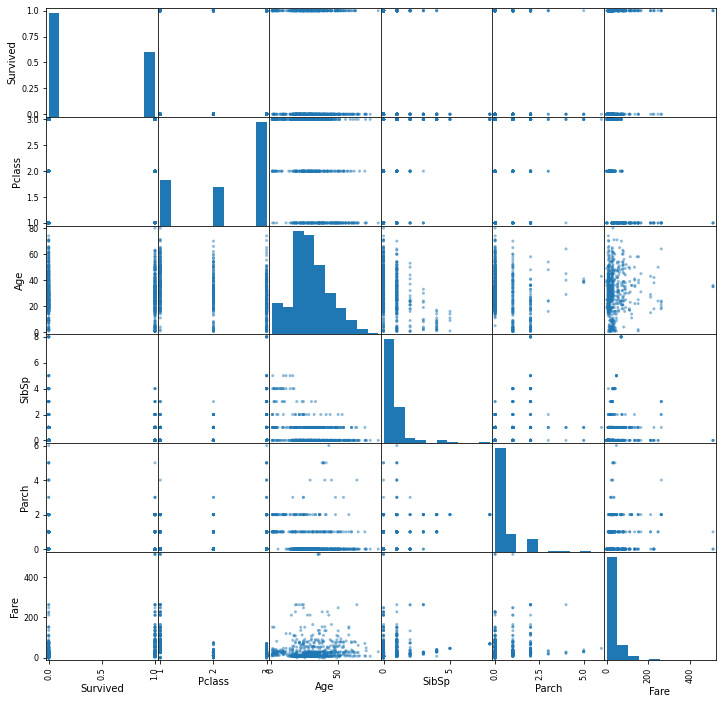

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(titanic[['Survived','Pclass','Age','SibSp','Parch','Fare']],figsize=(12, 12))

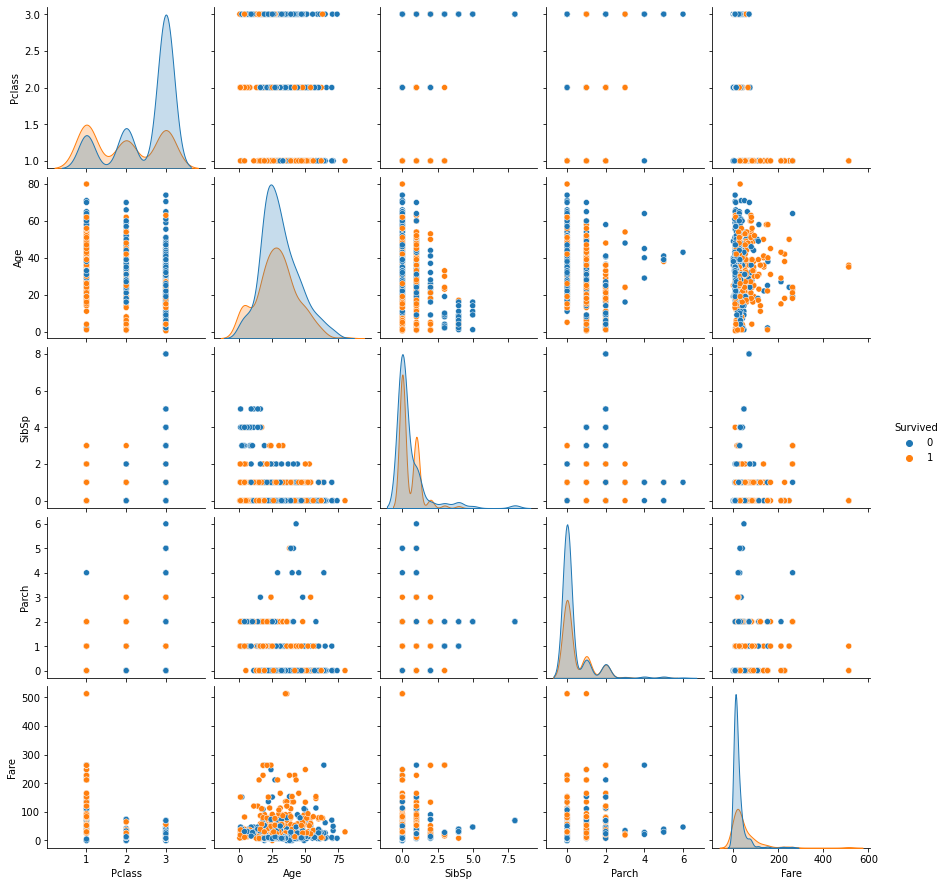

In [9]:
import seaborn as sns
sns.pairplot(titanic[['Survived','Pclass','Age','SibSp','Parch','Fare']], hue='Survived')

It seems that there are few correlations. The most promising seems to be Fare-Pclass

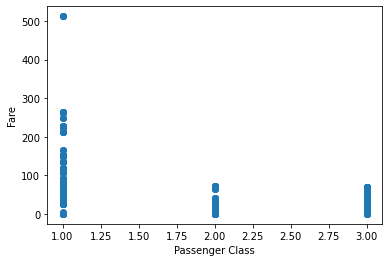

In [10]:
plt.scatter(titanic['Pclass'],titanic['Fare'])
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

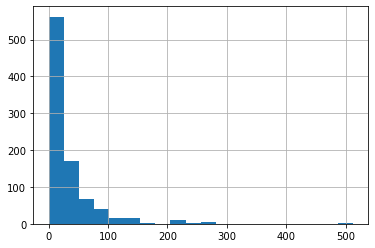

In [11]:
titanic['Fare'].hist(bins=20)
plt.show()

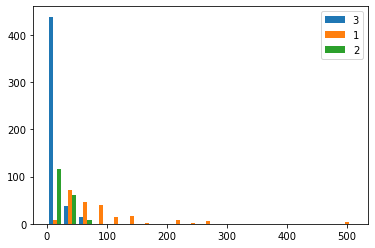

In [12]:
pc = titanic['Pclass'].unique()
plt.hist([titanic.loc[titanic['Pclass'] == c, 'Fare'] for c in pc], label=pc, bins=20)
plt.legend()
plt.show()

In [13]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

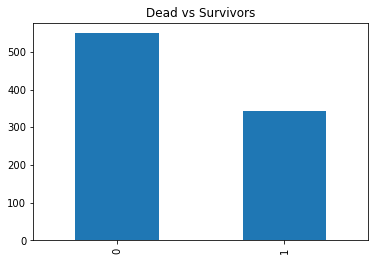

In [14]:
titanic['Survived'].value_counts().plot(kind='bar',
                                   title='Dead vs Survivors')
plt.show()

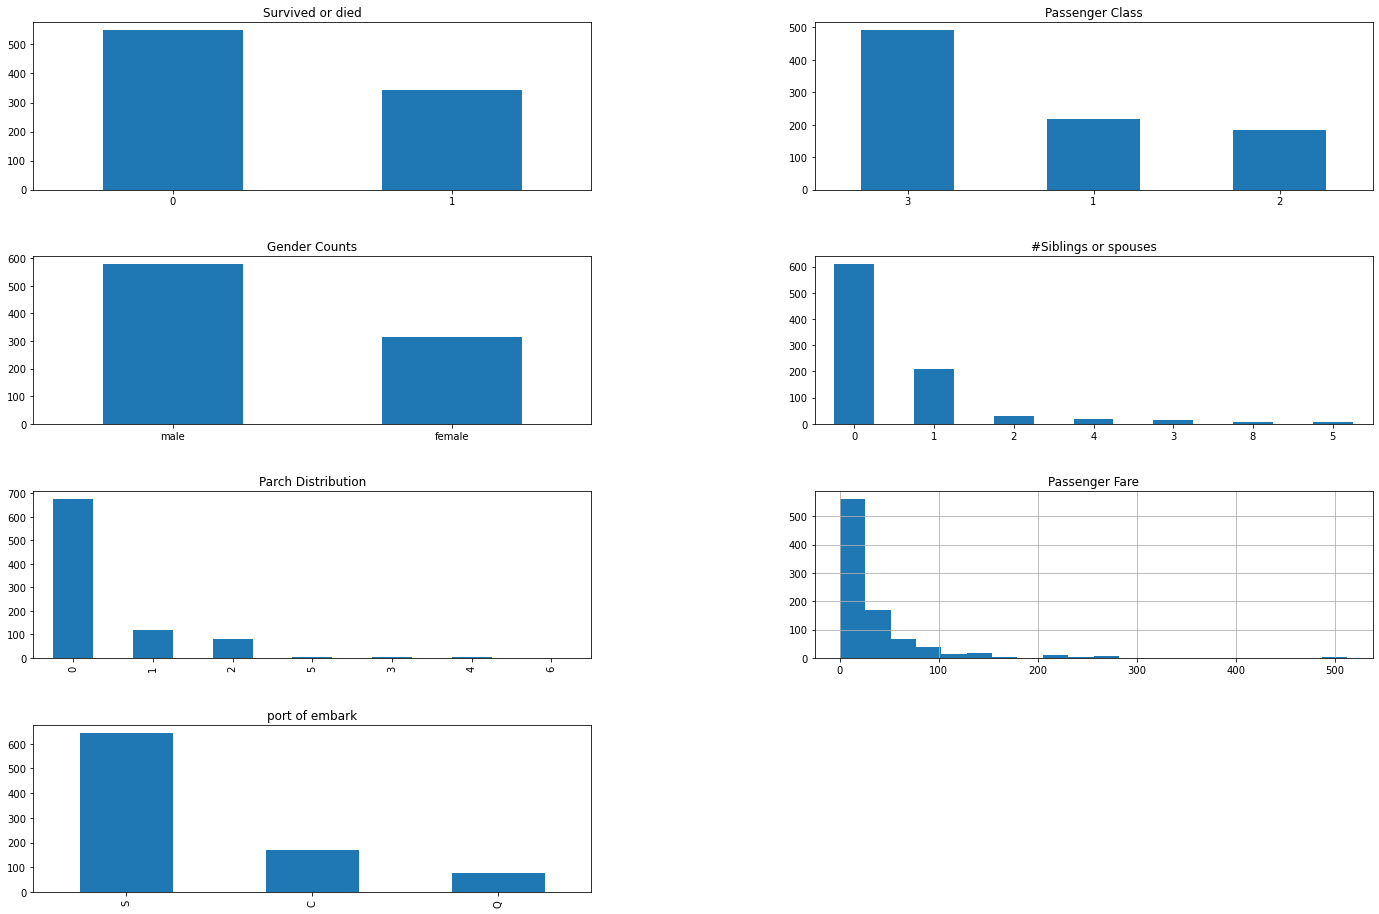

In [15]:
# Set up a grid of plots:
fig = plt.figure(figsize=(24, 16)) 
fig_dims = (4, 2)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot2grid(fig_dims, (0, 0))
titanic['Survived'].value_counts().plot(kind='bar',
                                   title='Survived or died')
plt.xticks(rotation=0)

plt.subplot2grid(fig_dims, (0, 1))
titanic['Pclass'].value_counts().plot(kind='bar', title='Passenger Class')
plt.xticks(rotation=0)

plt.subplot2grid(fig_dims, (1, 0))
titanic['Sex'].value_counts().plot(kind='bar', title='Gender Counts')
plt.xticks(rotation=0)

# Plot Clients per day
plt.subplot2grid(fig_dims, (1, 1))
titanic['SibSp'].value_counts().plot(kind='bar', title='#Siblings or spouses')
plt.xticks(rotation=0)

plt.subplot2grid(fig_dims, (2, 0))
titanic['Parch'].value_counts().plot(kind='bar', title='#of parents or children')
plt.title("Parch Distribution")


# Plot Size counts
plt.subplot2grid(fig_dims, (2, 1))
titanic['Fare'].hist(bins=20)
plt.title("Passenger Fare")
plt.xticks(rotation=0)

plt.subplot2grid(fig_dims, (3, 0))
titanic['Embarked'].value_counts().plot(kind='bar', title='port of embark')

plt.show()

In [16]:
Surv_class = pd.crosstab(titanic['Pclass'], titanic['Survived'])
Surv_class

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [17]:
Surv_class.sum(1)

Pclass
1    216
2    184
3    491
dtype: int64

In [18]:
Surv_class_pct = Surv_class.div(Surv_class.sum(1).astype(float), axis=0)
Surv_class_pct

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


In [ ]:
Surv_class_pct.plot(kind='bar', stacked=False, 
                   title='Survival per Class')
plt.xlabel('Class')
plt.ylabel('Survived')
plt.show()

In [ ]:
Surv_class = pd.crosstab(titanic['Sex'], titanic['Survived'])
Surv_class

In [ ]:
Surv_class_pct = Surv_class.div(Surv_class.sum(1).astype(float), axis=0)
Surv_class_pct

In [ ]:
Surv_class_pct.plot(kind='bar', stacked=False, 
                   title='Survival per Sex')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.show()

## Missing Values: detection and replacement

In [ ]:
titanic.isnull().any()

In [ ]:
titanic.isnull().sum()

In [ ]:
titanic[titanic['Age'].isnull()]

In [ ]:
titanic['Age']

In [ ]:
titanic['Cabin']

In [ ]:
titanic['Age'].mean()

In [ ]:
m = titanic['Age'].mean()
titanic['Age'] = titanic['Age'].fillna(m)

In [ ]:
titanic['Age'].isnull().sum()

In [ ]:
titanic['Age'].hist(bins=30)
plt.show()

Mean imputation has certain disadvantages. If the data has a very uneven distribution, with many outliers, then the Mean will not reflect the actual distribution of the data. Mean is affected greatly by extreme values or outliers. So, if the data doesn’t have many outliers and follows near-normal distribution, use mean imputation

In [ ]:
titanic = pd.read_csv(DATASET_FOLDER + 'titanic.csv')
titanic['Age'].isnull().sum()

In [ ]:
m = titanic['Age'].median()
m

In [ ]:
titanic['Age'] = titanic['Age'].fillna(m)

In [ ]:
titanic['Age'].hist(bins=30)
plt.show()

In [ ]:
titanic = pd.read_csv(DATASET_FOLDER + 'titanic.csv')
titanic['Age'].isnull().sum()

The advantage of the median is, it is unaffected by the outliers, unlike the mean. Let us implement it here.

In [ ]:
titanic['Embarked'].isnull().sum()

In [ ]:
titanic[titanic['Embarked'].isnull()]

In [ ]:
m = titanic['Embarked'].mode()

In [ ]:
m

In [ ]:
m = titanic['Embarked'].mode()
titanic['Embarked'] = titanic['Embarked'].fillna(m[0])

In [ ]:
titanic['Cabin'].isnull().sum()

In [ ]:
len(titanic)

In [ ]:
titanic = titanic.drop(['Cabin'], axis=1)


In [ ]:
titanic

## Let's go more in depth with the titanic (not too much or we will drown...)

In [ ]:
titanic = pd.read_csv(DATASET_FOLDER + 'titanic.csv')
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode())
titanic.drop('Cabin', axis=1, inplace=True)

In [ ]:
titanic

In [ ]:
age_by_pclass_sex = titanic.groupby(['Sex', 'Pclass']).median()['Age']

In [ ]:
age_by_pclass_sex

In [ ]:
# Filling the missing values in Age with the medians of Sex and Pclass groups
titanic['Age'] = titanic.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

From a carefull data analysis emerges that the Fare is cumulative with respect to various Tickets with the same identifier. Consequently we proceed in correcting the Fare of each passenger by dividing it with the number of Tickets with the same identifier.

In [ ]:
dfnt = titanic[['Pclass', 'Ticket']].groupby(['Ticket']).count().reset_index()

In [ ]:
dfnt['NumTickets'] = dfnt['Pclass']
dfnt.drop(['Pclass'], axis=1, inplace=True)

In [ ]:
dfnt

In [ ]:
titanic = titanic.join(dfnt.set_index('Ticket'), on='Ticket')

In [ ]:
titanic

In [ ]:
titanic['NumTickets'].corr(titanic['SibSp']) 

In [ ]:
titanic['NumTickets'].corr(titanic['Parch']) 

In [ ]:
titanic['Fare'] = titanic['Fare']/titanic['NumTickets']

In [ ]:
titanic

In [ ]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

In [ ]:
titanic['IsAlone'] = 1 # initialize to yes/1 is alone
titanic['IsAlone'].loc[titanic['FamilySize'] > 1] = 0 # update to no/0 if family size is greater than 1

The features NumTickets and Ticket helped in correcting Fare and we do not need theme any more.  
The features SibSp and Parch are redundant with respect to FamilySize.  

In [ ]:
column2drop = ['SibSp', 'Parch', 'NumTickets', 'Ticket']
titanic.drop(column2drop, axis=1, inplace=True)

In [ ]:
titanic

In [ ]:
titanic['Sex_number'] = titanic.apply(lambda row: 0 if row['Sex'] == 'male' else 1, axis=1)

In [ ]:
titanic.corr()

In [ ]:
sns.pairplot(titanic[['Survived','Pclass','Age','FamilySize','IsAlone','Fare','Sex_number']], hue='Survived')

In [ ]:
numericals = ['Age','Fare']
categoricals = ['Pclass','Sex_number','FamilySize','IsAlone']
total_features = numericals + categoricals
survs = [0,1]

In [ ]:
for n in numericals:
        plt.hist([titanic[titanic['Survived']==s][n] for s in survs], label=survs, bins=30)
        plt.title(n)
        plt.legend()
        plt.show()

In [ ]:
for c in categoricals:
        # sex wrt smoker
    xt = pd.crosstab(titanic[c], titanic['Survived'])
    xt_pct = xt.div(xt.sum(1).astype(float), axis=0)
    xt_pct.plot(kind='bar', stacked=False, 
                   title=c)
    plt.xlabel(c)
    plt.ylabel('Survived')
    plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [ ]:
my_pca = PCA(n_components=2)
preprocessed_train = preprocessing.normalize(preprocessing.scale(titanic[total_features]))
#print(preprocessed_train.shape)
#missing feature scaling and normalization
my_pca.fit(preprocessed_train)
trans = my_pca.transform(preprocessed_train)

In [ ]:
trans.shape

In [ ]:
fig, axs = plt.subplots(3, 2, squeeze=False, sharex=True, sharey=True, figsize=(12, 18))
axs[0, 0].plot(trans[:,0], trans[:,1], '.')
axs[0, 0].set_title('PCA: Basic')

female_trans = np.array([tran for is_female, tran in zip(titanic['Sex_number'], trans) if is_female==1])
axs[0, 1].plot(trans[:,0], trans[:,1], '.', label='Male')
axs[0, 1].plot(female_trans[:,0], female_trans[:,1], 'r.', label='Female')
axs[0, 1].set_title('Sex')
axs[0, 1].legend()

axs[1, 0].scatter(trans[:,0], trans[:,1], edgecolors='face', c=titanic['FamilySize'])
axs[1, 0].set_title('FamilySize')
                    
third_trans = np.array([tran for my_class, tran in zip(titanic['Pclass'], trans) if my_class==3])
second_trans = np.array([tran for my_class, tran in zip(titanic['Pclass'], trans) if my_class==2])
axs[1, 1].plot(trans[:,0], trans[:,1], '.', label='First')
axs[1, 1].plot(third_trans[:,0], third_trans[:,1], '.r', label='Second')
axs[1, 1].plot(second_trans[:,0], second_trans[:,1], '.g', label='Third')
axs[1, 1].set_title('Class')
axs[1, 1].legend()

axs[2, 0].scatter(trans[:,0], trans[:,1], edgecolors='face', c=titanic['Age'])
axs[2, 0].set_title('Age')

axs[2, 1].scatter(trans[:,0], trans[:,1], edgecolors='face', c=titanic['Fare'])
axs[2, 1].set_title('Fare')

In [ ]:
fig, ax = plt.subplots()
ax.scatter(trans[:,0], trans[:,1], edgecolors='face', s=10, c=titanic['Survived'])
ax.set_title('Survival')

## A word on sampling
Our datasets are small and do not require to be sampled. However, larger dataset may require this procedure.

In [ ]:
titanic

In [ ]:
titanic.sample(frac=0.1)

In [ ]:
x = titanic.sample(frac=0.1)
y = titanic.sample(frac=0.1)

In [ ]:
x.equals(y)

Sampling is random by default.

In [ ]:
x = titanic.sample(frac=0.1, random_state=1)
y = titanic.sample(frac=0.1, random_state=1)

In [ ]:
x.equals(y)

Stratified sampling must be performed with respect to a selected attribute

In [ ]:
titanic['Sex'].hist()

In [ ]:
sexes = titanic.groupby('Sex', group_keys=False).apply(lambda x: x.sample(frac=0.3))

In [ ]:
sexes['Sex'].hist()

In [ ]:
titanic['Sex'].value_counts()[0]/titanic['Sex'].value_counts()[1]

In [ ]:
sexes['Sex'].value_counts()[0]/sexes['Sex'].value_counts()[1]

In [ ]:
titanic